# Итоговое задание по Проект 3. О вкусной и здоровой пище 
***
### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import re
from sklearn.model_selection import train_test_split # Загружаем специальный инструмент для разбивки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

### Импорт данных

In [2]:
df = pd.read_csv('main_task.csv')
df.columns = ['Restaurant_id', 'City', 'Cuisine_Style', 'Ranking', 'Rating',
       'Price_Range', 'Number_of_Reviews', 'Reviews', 'URL_TA', 'ID_TA']
df.head()

,Restaurant_id,City,Cuisine_Style,Ranking,Rating,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


### Детальный анализ по переменным

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine_Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price_Range        26114 non-null  object 
 6   Number_of_Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


### 1. Restaurant_id 
##### — идентификационный номер ресторана / сети ресторанов;

In [4]:
df['Restaurant_id'] = df['Restaurant_id'].apply(lambda x: float(x[3:]))
df.head(3)

,Restaurant_id,City,Cuisine_Style,Ranking,Rating,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA
0,5569.0,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,1535.0,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,352.0,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781


#### Переменная Restaurant_id
Преобразован идентификационный номер ресторана в числовое значение.\
Визуально видно, что данный признак схож с признаком Ranking.\
Пока что оставим его, но впоследствии проверим их корреляцию.

### 2. City
##### — город, в котором находится ресторан;

In [5]:
print(f'Количество городов в датасете - {len(df.City.unique())}')
print(df.City.unique())

Количество городов в датасете - 31
['Paris' 'Stockholm' 'London' 'Berlin' 'Munich' 'Oporto' 'Milan'
 'Bratislava' 'Vienna' 'Rome' 'Barcelona' 'Madrid' 'Dublin' 'Brussels'
 'Zurich' 'Warsaw' 'Budapest' 'Copenhagen' 'Amsterdam' 'Lyon' 'Hamburg'
 'Lisbon' 'Prague' 'Oslo' 'Helsinki' 'Edinburgh' 'Geneva' 'Ljubljana'
 'Athens' 'Luxembourg' 'Krakow']


Введем признак столичного расположения ресторана

In [6]:
not_capital = ["Krakow", "Lyon","Zurich","Hamburg","Barcelona","Oporto","Munich","Milan","Geneva"]

In [7]:
capital_rest=[]
other_city_rest=[]
for i in df['City']:
    if i in not_capital:
        other_city_rest.append(i)
    else:
        capital_rest.append(i)
        
print(f'Количество ресторанов в столицах:{len(capital_rest)}')
print(f'Количество остальных ресторанов :{len(other_city_rest)}')

Количество ресторанов в столицах:30424
Количество остальных ресторанов :9576


In [8]:
df['Capital_restaurant']=df['City'].apply(lambda x: 0 if x in not_capital else 1)
df[['Capital_restaurant']].head()

,Capital_restaurant
0,1
1,1
2,1
3,1
4,0


Переведем признак City в dummy-переменные

In [9]:
df_City_dummies = pd.get_dummies(df['City'], dummy_na=False).astype('float64')
df = pd.concat([df,df_City_dummies], axis=1)

#### Переменная City
Без пропусков, категориальный признак.
Сгенерированы новые признаки города по типу dummies.\
А также численный признак столичного расположения ресторана - Capital_restaurant.

### 3. Cuisine_Style
##### — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;

In [10]:
(pd.isna(df['Cuisine_Style']).astype('float64')).value_counts()

0.0    30717
1.0     9283
Name: Cuisine_Style, dtype: int64

In [11]:
# проведем обработку значений переменной
df['Cuisine_Style']= df['Cuisine_Style'].str.replace(r'[\[\]\']','')
# заполним пропуски значением 'Unspecified'
df['Cuisine_Style'] = df['Cuisine_Style'].fillna('Unspecified')
#посчитаем количество кухонь в каждом ресторане
df['Сount_Сuisine'] = df.Cuisine_Style.apply(lambda x: len(x.split(',')))

#### Переменная Cuisine_Style
9283 пропусков. заменим их на значение - 'Unspecified'.\
Сгенерирован новый признак количества кухонь в каждом ресторане - 'Сount_Сuisine'

### 4. Ranking
##### — место, которое занимает данный ресторан среди всех ресторанов своего города;

In [12]:
df.Ranking.describe()

count    40000.000000
mean      3676.028525
std       3708.749567
min          1.000000
25%        973.000000
50%       2285.000000
75%       5260.000000
max      16444.000000
Name: Ranking, dtype: float64

In [13]:
df[['Restaurant_id','Ranking']].corr()

,Restaurant_id,Ranking
Restaurant_id,1.0,1.0
Ranking,1.0,1.0


In [14]:
df = df.drop(['Restaurant_id'], axis=1)

#### Переменная Ranking
Без пропусков. Полностью скоррелирована с Restaurant_id.\
Следовательно Restaurant_id можно удалить

Попробуем также выяснить, как население городов влияет на место,\
которое занимает данный ресторан среди всех ресторанов своего города.\
Для этого необходимо ввести данные о количестве населения.

In [15]:
Сity_population= {'London' : 8539, 'Paris' : 2197, 'Madrid' : 3222, 'Barcelona' : 1621, 
                        'Berlin' : 3723, 'Milan' : 1342, 'Rome' : 2869, 'Prague' : 1281, 
                        'Lisbon' : 506, 'Vienna' : 1889, 'Amsterdam' : 866, 'Brussels' : 179, 
                        'Hamburg' : 1718, 'Munich' : 1450, 'Lyon' : 516, 'Stockholm' : 961, 
                        'Budapest' : 1745, 'Warsaw' : 1790, 'Dublin' : 554, 
                        'Copenhagen' : 616, 'Athens' : 665, 'Edinburgh' : 513, 
                        'Zurich' : 402, 'Oporto' : 249, 'Geneva' : 184, 'Krakow' : 755, 
                        'Oslo' : 693, 'Helsinki' : 643, 'Bratislava' : 426, 
                        'Luxembourg' : 120, 'Ljubljana' : 284}
df['Сity_population'] = df.apply(lambda row: Сity_population[row['City']], axis = 1)

Мы также отнормируем данный признак и внесем его в датасет

In [16]:
mean_Ranking_on_City = df.groupby(['City'])['Ranking'].mean()
df['mean_Ranking_on_City'] = df.City.map(mean_Ranking_on_City)
df['norm_Ranking_on_Popul_in_City'] = (df['Ranking'] - df['mean_Ranking_on_City']) / df['Сity_population']

### 5. Price_Range
##### — диапазон цен в ресторане;

In [17]:
pd.isna(df['Price_Range']).astype('float64').value_counts()

0.0    26114
1.0    13886
Name: Price_Range, dtype: int64

In [18]:
df['Price_Range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price_Range, dtype: int64

In [19]:
round(df['Price_Range'].value_counts()[0] /
      df['Price_Range'].value_counts().sum(),2)

0.71

In [20]:
df.loc[df['Price_Range'] == '$$$$', ['Price_Range']] = 3
df.loc[df['Price_Range'] == '$$ - $$$', ['Price_Range']] = 2
df.loc[df['Price_Range'] == '$', ['Price_Range']] = 1
df['Price_Range'] = df['Price_Range'].fillna(2)
df['Price_Range'].value_counts()

2    32298
1     6279
3     1423
Name: Price_Range, dtype: int64

#### Переменная Price_Range
13886 - пропусков. Был изменен признак с символьного на числовой с сохранением сути значений\
(низкая цена - 1, средняя цена -2 , высокая цена - 3)\
18412 ресторанов имеют средний параметр цены, это 71% из имеющейся информации\
поэтому заполняем пропуски средним значением

### 5. Number of Reviews
#### — количество отзывов о ресторане;

In [21]:
pd.isna(df['Number_of_Reviews']).astype('float64').value_counts()

0.0    37457
1.0     2543
Name: Number_of_Reviews, dtype: int64

In [22]:
means1 = df.groupby('City')['Number_of_Reviews'].mean()
df['Number_of_Reviews_means'] = round(df.City.map(means1),0)

In [23]:
df['Number_of_Reviews'] = df['Number_of_Reviews'].fillna(df['Number_of_Reviews'].mean())
df['Number_of_Reviews'].value_counts()

124.82548     2543
2.00000       1916
3.00000       1636
4.00000       1370
5.00000       1181
              ... 
2123.00000       1
1633.00000       1
1480.00000       1
1924.00000       1
1383.00000       1
Name: Number_of_Reviews, Length: 1460, dtype: int64

#### Переменная Number of Reviews
2543 - пропусков. Оставляем их и заменям средним значением по признаку.\
Сгенерирован новый признак среднего количество отзывов о ресторане по городам - 'Number_of_Reviews_means'.\
Заполним пропуски средним по количеству отзывов

Посмотрим как количество отзывов зависит от рейтинга ресторана, для этого создадим признак

In [24]:
#df['Ranking_by_Number'] = round(df['Ranking']/df['Number_of_Reviews'],2)

Результаты метрик показали, что данная переменная ухудшает метрику

### 6. Reviews
#### — данные о двух отзывах, которые отображаются на сайте ресторана;

In [25]:
df['Reviews'] = df['Reviews'].fillna('[[], []]')
df['Reviews'] = df['Reviews'].str.replace(r'\[\[\], \[\]\]','None')
s = df['Reviews'].str.split(r"'\], \['",expand=True)
s.columns = ['comments','dates']
s1 = s['comments'].str.split(r"', '",expand=True)
s1.columns = ['comment1','comment2']
s2 = s['dates'].str.split(r"', '",expand=True)
s2.columns = ['date1','date2']
s3 = pd.concat([s1,s2],axis=1)
s3.date1 = s3.date1.str.replace(r'[\[\]\']','')
s3.date2 = s3.date2.str.replace(r'[\[\]\']','')
df_new = pd.concat([df,s3],axis=1)

In [26]:
date1null = pd.isna(df_new['date1']).astype('float64')
date2null = pd.isna(df_new['date2']).astype('float64')
df_new['len_comment'] = (1 - date1null) + (1 -date2null)
df_new[['len_comment']].head()

,len_comment
0,2.0
1,2.0
2,2.0
3,0.0
4,2.0


In [27]:
df_new['date1'] = pd.to_datetime(df_new['date1'])
df_new['date2'] = pd.to_datetime(df_new['date2'])
df_new['diff_date']=abs(df_new['date1']-df_new['date2'])
df_new.diff_date = df_new.diff_date.dt.days
df_new.diff_date = df_new.diff_date.fillna(0)

In [28]:
dayspass = df_new['date1'].max()-df_new['date1']
dayspass2 = df_new['date1'].max()-df_new['date2']
df_new['dayspass'] = np.where(dayspass >= dayspass2, dayspass, dayspass2)
df_new['dayspass'] = df_new['dayspass'].fillna(pd.to_timedelta(0))
df_new['dayspass'] = df_new['dayspass'].dt.days

In [29]:
df_new.drop(['Reviews','comment1','comment2','date1','date2'], axis='columns', inplace=True)

#### Переменная Reviews
Пропусков данных нет, каждая ячейка заполнена, но есть 6471 значений '[[], []]'\
И по сути можно расценить их как пропуски.
Были созданы признаки:\
len_comment - кол-во коментариев в отзыве;\
dayspass - насколько давно был сделан последний самый свежий отзыв в днях(на момент получения базы);\
diff_date - перерыв между отзывами в днях;\
Пропуски в данных признаках пока что заменим на 0, так как не удаляем значения из датасета.
Также был убран из основного датасета сам признак Reviews, послуживший донором информации для созданных признаков,\
и были удалены признаки, несущие информацию, полученые из данного признака, поскольку в них больше нет необходимости

In [30]:
df_new.head()

,City,Cuisine_Style,Ranking,Rating,Price_Range,Number_of_Reviews,URL_TA,ID_TA,Capital_restaurant,Amsterdam,...,Warsaw,Zurich,Сount_Сuisine,Сity_population,mean_Ranking_on_City,norm_Ranking_on_Popul_in_City,Number_of_Reviews_means,len_comment,diff_date,dayspass
0,Paris,"European, French, International",5570.0,3.5,2,194.0,/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,1,0.0,...,0.0,0.0,3,2197,6933.012048,-0.620397,120.0,2.0,41.0,98
1,Stockholm,Unspecified,1537.0,4.0,2,10.0,/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1,0.0,...,0.0,0.0,1,961,1242.386585,0.306570,78.0,2.0,382.0,617
2,London,"Japanese, Sushi, Asian, Grill, Vegetarian Frie...",353.0,4.5,3,688.0,/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,1,0.0,...,0.0,0.0,7,8539,8198.461873,-0.918780,138.0,2.0,2.0,51
3,Berlin,Unspecified,3458.0,5.0,2,3.0,/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,1,0.0,...,0.0,0.0,1,3723,3266.237123,0.051508,67.0,0.0,0.0,0
4,Munich,"German, Central European, Vegetarian Friendly",621.0,4.0,2,84.0,/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,0.0,...,0.0,0.0,3,1450,1370.539754,-0.516924,81.0,2.0,272.0,372


In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   City                           40000 non-null  object 
 1   Cuisine_Style                  40000 non-null  object 
 2   Ranking                        40000 non-null  float64
 3   Rating                         40000 non-null  float64
 4   Price_Range                    40000 non-null  int64  
 5   Number_of_Reviews              40000 non-null  float64
 6   URL_TA                         40000 non-null  object 
 7   ID_TA                          40000 non-null  object 
 8   Capital_restaurant             40000 non-null  int64  
 9   Amsterdam                      40000 non-null  float64
 10  Athens                         40000 non-null  float64
 11  Barcelona                      40000 non-null  float64
 12  Berlin                         40000 non-null 

In [32]:
df_new.drop(df_new.select_dtypes(['object']), inplace=True, axis=1)
df_new.head()

,Ranking,Rating,Price_Range,Number_of_Reviews,Capital_restaurant,Amsterdam,Athens,Barcelona,Berlin,Bratislava,...,Warsaw,Zurich,Сount_Сuisine,Сity_population,mean_Ranking_on_City,norm_Ranking_on_Popul_in_City,Number_of_Reviews_means,len_comment,diff_date,dayspass
0,5570.0,3.5,2,194.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,2197,6933.012048,-0.620397,120.0,2.0,41.0,98
1,1537.0,4.0,2,10.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,961,1242.386585,0.306570,78.0,2.0,382.0,617
2,353.0,4.5,3,688.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7,8539,8198.461873,-0.918780,138.0,2.0,2.0,51
3,3458.0,5.0,2,3.0,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1,3723,3266.237123,0.051508,67.0,0.0,0.0,0
4,621.0,4.0,2,84.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,1450,1370.539754,-0.516924,81.0,2.0,272.0,372


In [33]:
df_new.columns

Index(['Ranking', 'Rating', 'Price_Range', 'Number_of_Reviews',
       'Capital_restaurant', 'Amsterdam', 'Athens', 'Barcelona', 'Berlin',
       'Bratislava', 'Brussels', 'Budapest', 'Copenhagen', 'Dublin',
       'Edinburgh', 'Geneva', 'Hamburg', 'Helsinki', 'Krakow', 'Lisbon',
       'Ljubljana', 'London', 'Luxembourg', 'Lyon', 'Madrid', 'Milan',
       'Munich', 'Oporto', 'Oslo', 'Paris', 'Prague', 'Rome', 'Stockholm',
       'Vienna', 'Warsaw', 'Zurich', 'Сount_Сuisine', 'Сity_population',
       'mean_Ranking_on_City', 'norm_Ranking_on_Popul_in_City',
       'Number_of_Reviews_means', 'len_comment', 'diff_date', 'dayspass'],
      dtype='object')

In [34]:
df_new2 = df_new.drop(['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Bratislava', 'Brussels',
       'Budapest', 'Copenhagen', 'Dublin', 'Edinburgh', 'Geneva', 'Hamburg',
       'Helsinki', 'Krakow', 'Lisbon', 'Ljubljana', 'London', 'Luxembourg',
       'Lyon', 'Madrid', 'Milan', 'Munich', 'Oporto', 'Oslo', 'Paris',
       'Prague', 'Rome', 'Stockholm', 'Vienna', 'Warsaw', 'Zurich'],axis = 1)
df_new2

,Ranking,Rating,Price_Range,Number_of_Reviews,Capital_restaurant,Сount_Сuisine,Сity_population,mean_Ranking_on_City,norm_Ranking_on_Popul_in_City,Number_of_Reviews_means,len_comment,diff_date,dayspass
0,5570.0,3.5,2,194.0,1,3,2197,6933.012048,-0.620397,120.0,2.0,41.0,98
1,1537.0,4.0,2,10.0,1,1,961,1242.386585,0.306570,78.0,2.0,382.0,617
2,353.0,4.5,3,688.0,1,7,8539,8198.461873,-0.918780,138.0,2.0,2.0,51
3,3458.0,5.0,2,3.0,1,1,3723,3266.237123,0.051508,67.0,0.0,0.0,0
4,621.0,4.0,2,84.0,0,3,1450,1370.539754,-0.516924,81.0,2.0,272.0,372
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,500.0,4.5,2,79.0,0,4,1342,3098.143929,-1.936024,174.0,2.0,34.0,106
39996,6341.0,3.5,2,542.0,1,5,2197,6933.012048,-0.269464,120.0,2.0,9.0,76
39997,1652.0,4.5,2,4.0,1,2,961,1242.386585,0.426237,78.0,2.0,3127.0,3607
39998,641.0,4.0,2,70.0,1,5,1790,1063.039890,-0.235776,65.0,2.0,23.0,253


Посмотрим на корреляцию всех признаков, но без учета dummy переменных.
***

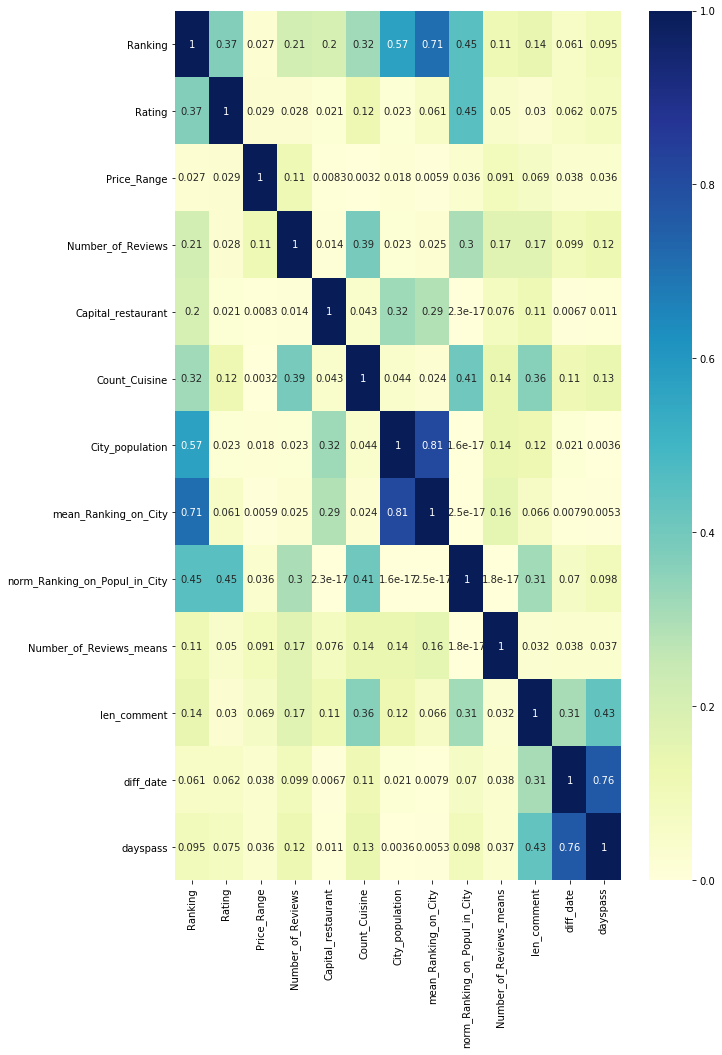

In [35]:
plt.figure(figsize=(10, 16))
sns.heatmap(df_new2.corr().abs(), vmin=0, vmax=1, annot = True, cmap="YlGnBu")

Как мы видим, что относительно сильная корреляция выявлена между двух пар созданных признаков - 'diff_date' и 'dayspass',\
и Сity_population' и 'mean_Ranking_on_City'\
Не будем удалять никаие признаки. 
Выбросы из признаков тоже не удаляем.

In [36]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ranking                        40000 non-null  float64
 1   Rating                         40000 non-null  float64
 2   Price_Range                    40000 non-null  int64  
 3   Number_of_Reviews              40000 non-null  float64
 4   Capital_restaurant             40000 non-null  int64  
 5   Amsterdam                      40000 non-null  float64
 6   Athens                         40000 non-null  float64
 7   Barcelona                      40000 non-null  float64
 8   Berlin                         40000 non-null  float64
 9   Bratislava                     40000 non-null  float64
 10  Brussels                       40000 non-null  float64
 11  Budapest                       40000 non-null  float64
 12  Copenhagen                     40000 non-null 

In [37]:
X = df_new.drop(["Rating"], axis=1)
y = df_new["Rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [38]:
regr = RandomForestRegressor(n_estimators=100)
regr.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
def predict(df, target="Rating"):
    X = df_new.drop([target], axis=1)
    y = df_new[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    regr = RandomForestRegressor(n_estimators=100)
    regr.fit(X_train, y_train)  

    y_pred = regr.predict(X_test)    
    
    mea = metrics.mean_absolute_error(y_pred, y_test)
    
    return 'MAE:',round(mea,7)

In [40]:
a = predict(df_new)
print(a)

('MAE:', 0.208884)
